In [1]:
#This program performs a Stochastic Simulation Algorithm on birth-death process for multiple observations
# 0 -> X -> 0
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns
import timeit

# Predator-prey model

In [3]:
def predator_prey_ssa(x,T):
    #molecule count    x=[A,rA,B,rB]
    t_x=[0]            #reaction time
    i=0
    v=np.array([[1,0,],[-1,1],[0,-1]])
    while t_x[i]<T:
        a=np.array([c1*x[i,0],c2*x[i,0]*x[i,1],c3*x[i,1]])
        sum_a=np.sum(a)
        cumsum_a=np.cumsum(a,axis=0)
        epsilon=np.random.uniform(0,1,2)
        j=np.min(np.where(epsilon[0]*sum_a<cumsum_a)) 
        tau=(np.log(1/epsilon[1]))/sum_a
        x=np.append(x,[x[i,:]+v[j,:]],axis=0)
        t_x=np.append(t_x,[t_x[i]+tau])   
        i+=1
        if x[i,0]==0 and x[i,1]==0:
            print([x[i,:],t_x[i]])
            break
    return x,t_x

def plot_trajectory(x,t):
    plt.plot(t,x[:,0],c='C0',label=r'$Y_1$ prey')
    plt.plot(t,x[:,1],c='C1',label=r'$Y_2$ predator')   
    plt.tight_layout(h_pad=-1, w_pad=3)
    plt.legend()
    plt.xlabel('time t')
    plt.ylabel('population count')
    plt.show()

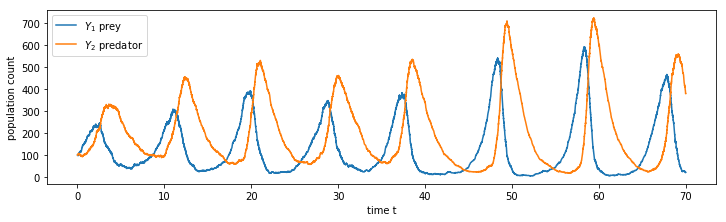

In [4]:
T=70
c1=1
c2=0.005
c3=0.6
f=plt.figure(figsize=(10,3))
x,t=predator_prey_ssa(np.array([[100,100]]),T)
plot_trajectory(x,t)
f.savefig('predator_prey_1.png', format='png', dpi=500,bbox_inches="tight")

[array([0, 0]), 27.46067060102169]


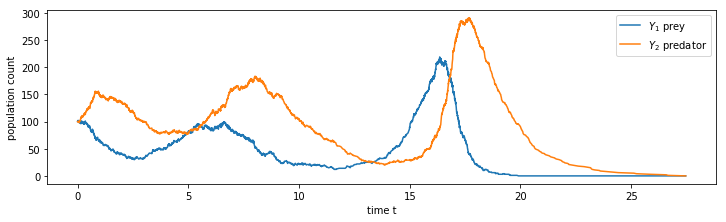

In [31]:
T=50
c1=1
c2=0.01
c3=0.6
f=plt.figure(figsize=(10,3))
x,t=predator_prey_ssa(np.array([[100,100]]),T)
plot_trajectory(x,t)
f.savefig('predator_prey_2.png', format='png', dpi=500,bbox_inches="tight")

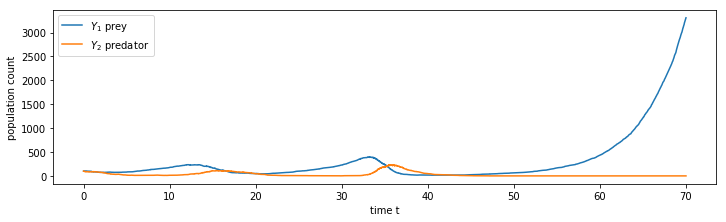

In [28]:
T=70
c1=0.2
c2=0.005
c3=0.6
f=plt.figure(figsize=(10,3))
x,t=predator_prey_ssa(np.array([[100,100]]),T)
plot_trajectory(x,t)
f.savefig('predator_prey_3.png', format='png', dpi=500,bbox_inches="tight")

# 2. Chemical reaction network

In [36]:
def chemical_ssa(x,k,alpha1,alpha2,ka,T):
    #molecule count   
    t_x=[0]            #reaction time
    i=0
    v=np.array([[1,0,],[-1,0],[0,1,],[0,-1],[-1,-1]])
    start = timeit.default_timer()
    while t_x[i]<T:
        a=np.array([k,alpha1*x[i,0],k,alpha2*x[i,1],ka*x[i,0]*x[i,1]])
        sum_a=np.sum(a)
        cumsum_a=np.cumsum(a,axis=0)
        epsilon=np.random.uniform(0,1,2)
        j=np.min(np.where(epsilon[0]*sum_a<cumsum_a)) 
        tau=(np.log(1/epsilon[1]))/sum_a
        x=np.append(x,[x[i,:]+v[j,:]],axis=0)
        t_x=np.append(t_x,[t_x[i]+tau])   
        i+=1
        if x[i,0]==0 and x[i,1]==0:
            print([x[i,:],t_x[i]])
            break
    stop = timeit.default_timer()
    #print([i,stop-start])
    return x,t_x

def plot_trajectory(x,t,i):
    axes[i].plot(t,x[:,0],c='C0',label=r'$X$')
    axes[i].plot(t,x[:,1],c='C1',label=r'$Y$')   


In [ ]:
T=[50,50]
#T=[100,10]
k=[10,10**3]
alpha1=[1e-6,1e-4]
alpha2=[1e-5,1e-3]
ka=[1e-5,1e-3]
f,axes=plt.subplots(1,2,figsize=(10,3))
for i in range(2):
    #x,t=chemical_ssa(np.array([[3000,300]]),k[i],alpha1[i],alpha2[i],ka[i],T[i])
    x,t=chemical_ssa(np.array([[0,0]]),k[i],alpha1[i],alpha2[i],ka[i],T[i])
    plot_trajectory(x,t,i)
    #axes[i].set_ylim([0,4000])
    #axes[i].set_yticks([0,2000,4000])
    axes[i].set_xticks(np.linspace(0,T[i],3))
    axes[i].set_xlabel(r'time $t$')
    axes[i].set_title('Simulation for parameter set %d' %(i+1))
axes[0].legend()
axes[0].set_ylabel('molecular count')
plt.tight_layout(h_pad=-1, w_pad=3)
f.savefig('chem_initial_fixed_point_1.png', format='png', dpi=500,bbox_inches="tight")

In [ ]:
a1=1e-4
a2=1e-3
ka=1e-3
k=10**3
a=ka*a2
b=a1*a2
c=-a1*k
y=((-b)+np.sqrt(b**2-4*a*c))/(2*a)
x=(a2/a1)*y 
print([x,y])
print([k-a1*x-ka*x*y,k-a2*y-ka*x*y])

In [ ]:
T=[100,5]
k=[10,10**3]
alpha1=[1e-6,1e-4]
alpha2=[1e-5,1e-3]
ka=[1e-5,1e-3]
repeats=1000
for i in range(1,2):
    xx=np.zeros(repeats)   
    yy=np.zeros(repeats)
    for j in range(repeats):
        x,t=chemical_ssa(np.array([[3000,300]]),k[i],alpha1[i],alpha2[i],ka[i],T[i])
        xx[j]=x[-1,0]
        yy[j]=x[-1,1]
    f=sns.jointplot(xx,yy,kind='kde')
    f.savefig('chem_stationary_set2.png', format='png', dpi=500,bbox_inches="tight")
    plt.show()

# 3. Transcription 

In [32]:
def transcription_ssa(x,T,n,K,typ):
    #molecule count    x=[r,p]
    t_x=[0]            #reaction time
    i=0
    v=np.array([[1,0,],[-1,0],[0,1,],[0,-1]])
    while t_x[i]<T:
        if typ=='positive':
            phi=(k0*(x[i,1]/K)**n)/(1+(x[i,1]/K)**n)
        else:
            phi=k0/(1+(x[i,1]/K)**n)
        a=np.array([kl+phi,gammar*x[i,0],kp*x[i,0],gammap*x[i,1]])
        sum_a=np.sum(a)
        cumsum_a=np.cumsum(a,axis=0)
        epsilon=np.random.uniform(0,1,2)
        j=np.min(np.where(epsilon[0]*sum_a<cumsum_a)) 
        tau=(np.log(1/epsilon[1]))/sum_a
        x=np.append(x,[x[i,:]+v[j,:]],axis=0)
        t_x=np.append(t_x,[t_x[i]+tau])   
        i+=1
        if x[i,0]==0 and x[i,1]==0:
            print([x[i,:],t_x[i]])
            break
    return x,t_x

def plot_trajectory(x,t,i):
    axes[i].plot(t,x[:,0],c='C0',label=r'mRNA $r$')
    axes[i].plot(t,x[:,1],c='C1',label=r'protein $p$') 


In [ ]:
def f1(r,p):
    if typ=='positive':
        phi=(k0*(p/K)**n)/(1+(p/K)**n)
    else:
        phi=k0/(1+(p/K)**n)
    return kl+phi-gammar*r

def f2(r,p):
    return kp*r-gammap*p

def ode_system(x,t=0):
    if typ=='positive':
        phi=(k0*(x[1]/K)**n)/(1+(x[1]/K)**n)
    else:
        phi=k0/(1+(x[1]/K)**n)
    return [kl+phi-gammar*x[0],kp*x[0]-gammap*x[1]]

def ff1(p):
    if typ=='positive':
        phi=(k0*(p/K)**n)/(1+(p/K)**n)
    else:
        phi=k0/(1+(p/K)**n)
    return (kl+phi)/gammar

def ff2(p):
    if typ=='positive':
        phi=(k0*(p/K)**n)/(1+(p/K)**n)
    else:
        phi=k0/(1+(p/K)**n)
    return gammap*p/kp

kl=0
gammap=gammar=kp=k0=1
K=0.5
n=1
typ='positive'
xx = np.linspace(0, 1.5, 10)
yy = np.linspace(0, 1.5, 10)
X1 , Y1  = np.meshgrid(xx, yy)                    # create a grid
DX1, DY1 = ode_system([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

f=plt.figure(figsize=(4,4))
plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
plt.scatter([0],[0],c='r')
plt.scatter([0.5],[0.5],c='r')
#plt.scatter([0.998],[1],c='r')
t=np.linspace(0,1.5,10000)
xx=ff1(t)
yy=ff2(t)
plt.plot(xx,t,label=r'$\dfrac{dr}{dt}=0$')
plt.plot(yy,t,label=r'$\dfrac{dp}{dt}=0$')
plt.xlabel(r'$r$')
plt.ylabel(r'$p$')
plt.legend(loc='lower right')
f.savefig('transcription_phase_portrait_n1.png', format='png', dpi=500)

In [ ]:
kl=0.001
gammap=0.00028
gammar=0.0083
kp=0.17
k0=0.01
K=10000
n=10
typ='negative'
xx = np.linspace(0.5,2, 20)  #r
yy = np.linspace(600, 1000, 20)  #p
X1 , Y1  = np.meshgrid(xx, yy)                    # create a grid
DX1, DY1 = ode_system([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

f=plt.figure(figsize=(5,5))
plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
#plt.scatter([0],[0],c='r')
#plt.scatter([0.5],[0.5],c='r')
#plt.scatter([0.99],[1],c='r')
t=np.linspace(600,1000,10000)   #p
xx=ff1(t)
yy=ff2(t)
plt.plot(xx,t,label=r'$\dfrac{dr}{dt}=0$')
plt.plot(yy,t,label=r'$\dfrac{dp}{dt}=0$')
plt.legend(loc='best')

In [ ]:
T=20000
kl=0.001
kp=0.17
k0=0.01
gammap=0.00028
gammar=0.0083
K=[100,10000]
n=10
init=[1,500]
f,axes=plt.subplots(2,2,figsize=(6,3),gridspec_kw={"height_ratios": (.9, .1)})
for i in range(2):
    x,t=transcription_ssa(np.array([init]),T,n,K[i],'negative')
    axes[0,i].plot(t,x[:,1],c='C1')
    axes[0,i].set_ylim([-50,1200])
    axes[0,i].set_yticks([0,600,1200])
    axes[0,i].set_xticks(np.linspace(0,T,3))
    axes[0,i].set_xticklabels([])
    axes[0,i].set_title(r'$K=$%d' %(K[i]))
    axes[1,i].plot(t,x[:,0],c='C0')
    axes[1,i].set_ylim([0,10])
    axes[1,i].set_xticks(np.linspace(0,T,3))
    axes[1,i].set_xlabel('time (sec)')
axes[0,0].set_ylabel(r'protein $p$')
axes[1,0].set_ylabel(r'mRNA $r$')
axes[0,1].set_yticklabels([])
axes[1,1].set_yticklabels([])
axes[0,1].set_xticklabels([])
plt.tight_layout(h_pad=-0.7, w_pad=0.5)

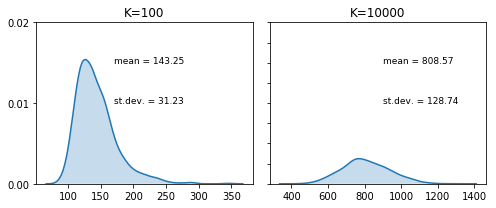

In [33]:
repeats=1000
T=20000
kl=0.001
kp=0.17
k0=0.01
gammap=0.00028
gammar=0.0083
K=[100,10000]
init=[1,500]
n=10
xpos=[170,900]
f,axes=plt.subplots(1,2,figsize=(7,3))
yy=np.zeros([repeats,2])
for i in range(2):
    #xx=np.zeros([repeats,2])   
    for j in range(repeats):
        x,t=transcription_ssa(np.array([init]),T,n,K[i],'negative')
        #xx[j,i]=x[-1,0]
        yy[j,i]=x[-1,1] 
    axes[i].set_ylim([0,0.02])
    sns.kdeplot(yy[:,i],shade=True,ax=axes[i])
    axes[i].set_title('K=%d' %(K[i]))
    axes[i].text(xpos[i],0.015,'mean = %3.2f' %np.mean(yy[:,i]),fontsize=9)
    axes[i].text(xpos[i],0.01,'st.dev. = %3.2f' %np.std(yy[:,i]),fontsize=9)
axes[0].set_yticks(np.linspace(0,0.02,3))
axes[1].set_yticklabels([])
plt.tight_layout(w_pad=1)
f.savefig('transcription_stationary_set2.png', format='png', dpi=500,bbox_inches="tight")
plt.show()